# Handwritten Number recognition System in machine learning (classification)

## Steps
<img src="images/ML.png" alt="tools" width="80%" >

## Tools
<img src="images/tools.png" alt="tools" width="60%" >

## Libraries

In [176]:
# data 
from sklearn.datasets import load_digits

# data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  make inline plots
%matplotlib inline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# model opreations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

#save model 
import pickle

# hide warnings 
import warnings
warnings.filterwarnings('ignore')

# print current date and time stamp
import time
print('last updated: ',time.asctime())

last updated:  Sun Jul 14 17:18:40 2024


## 1. Problem Defination

> take an input of 8x8 image containing handwritten digit, and predict the digit written on image



## 2. Data

for data source i am using sklearn built-in datasets

In [12]:
digits = load_digits()

In [13]:
# check whats inside the digits
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
# show the data
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## 3. Evaluation 
Evaluation in data analysis involves assessing the performance and accuracy of your models or analysis results. 
## 4. Features
In data analysis, features refer to the individual measurable properties or characteristics of the phenomena being observed. Features are crucial because they directly influence the predictive power of the models. 


## Data Analysis 

Data analysis refers to the process of inspecting, cleaning, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. It involves various techniques and methodologies to extract insights from data, often using statistical and computational tools. Key aspects of data analysis include:

* Data Collection: 
> Gathering relevant data from various sources, which could be databases, spreadsheets, APIs, or other data repositories.

* Data Cleaning:
>Preprocessing and cleaning the data to handle missing values, outliers, and inconsistencies that could affect the analysis.

* Exploratory Data Analysis (EDA): ,
>Analyzing and visualizing data to summarize its main characteristics, often using statistical graphics and summary statistics.

* Feature Engineering: 
>Creating new features or transforming existing ones to improve the performance of machine

### check the digits and understand all folders

In [15]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [16]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

it is the description of data

In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

here we have data for our csv file 

In [34]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

name of all the features

In [31]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

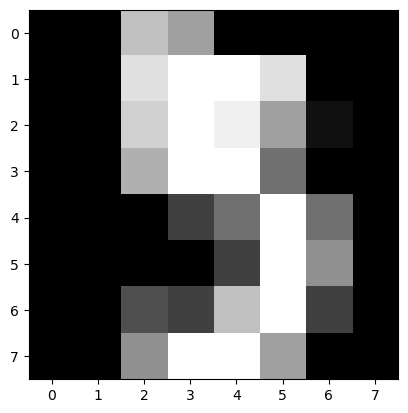

In [30]:
plt.imshow(digits.images[5], cmap='gray')
plt.show()

### convert data into pandas dataframe

In [35]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [39]:
# min and maximum grayscale used in image
df.min().min(),df.max().max()

(0.0, 16.0)

In [41]:
df.shape

(1797, 64)

In [42]:
df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [44]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
pixel_0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_0_2,5.0,0.0,0.0,7.0,0.0,12.0,0.0,7.0,9.0,11.0
pixel_0_3,13.0,12.0,4.0,15.0,1.0,10.0,12.0,8.0,14.0,12.0
pixel_0_4,9.0,13.0,15.0,13.0,11.0,0.0,13.0,13.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,13.0,11.0,3.0,13.0,2.0,16.0,9.0,5.0,16.0,12.0
pixel_7_4,10.0,16.0,11.0,13.0,16.0,16.0,15.0,0.0,15.0,13.0
pixel_7_5,0.0,10.0,16.0,9.0,4.0,10.0,11.0,0.0,11.0,3.0
pixel_7_6,0.0,0.0,9.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0


In [46]:
# check datatypes
df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [47]:
# convert into int
df = df.astype(int)

In [48]:
df.dtypes

pixel_0_0    int32
pixel_0_1    int32
pixel_0_2    int32
pixel_0_3    int32
pixel_0_4    int32
             ...  
pixel_7_3    int32
pixel_7_4    int32
pixel_7_5    int32
pixel_7_6    int32
pixel_7_7    int32
Length: 64, dtype: object

### visualization

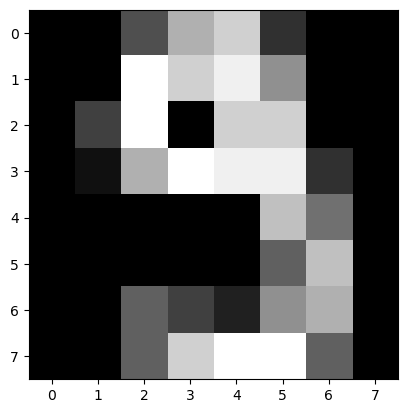

In [53]:
fig, ax = plt.subplots()
index =785
# Display the image using imshow
ax.imshow(digits.images[index], cmap='gray')


# Save the figure
plt.savefig(f'images/digit_image index {index}.png')

# Show the plot
plt.show()

In [60]:
# check the values of this image
df.iloc[785]

pixel_0_0     0
pixel_0_1     0
pixel_0_2     5
pixel_0_3    11
pixel_0_4    13
             ..
pixel_7_3    13
pixel_7_4    16
pixel_7_5    16
pixel_7_6     6
pixel_7_7     0
Name: 785, Length: 64, dtype: int32

In [174]:
# convert targets into dataframe 
target = pd.DataFrame(digits.target)

### save the dataframes as csv file

In [175]:
df.to_csv("data/images_data_64_features.csv")
target.to_csv("data/target.csv")

## 5. Modeling 

### EDA

In [97]:
# make x(feature) and y(target)
x= df
y= target

In [98]:
x.shape, y.shape

((1797, 64), (1797, 1))

In [99]:
len(x), len(y)

(1797, 1797)

In [113]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)
len(xtrain), len(ytrain), len(xtest), len(ytest)

(1437, 1437, 360, 360)

### Modeling

In [114]:
# Dictionary mapping classifier names to instantiated objects
classification_models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()
}

In [115]:
# function to fit all the model and return score of each
def fit_and_score_models(xtrain, xtest, ytrain, ytest):
    scores = {}
    
    for name, model in classification_models.items():
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        score = accuracy_score(ytest, ypred)
        scores[name] = score
    
    return scores

In [117]:
%%time 
# Get scores for all models
model_scores = fit_and_score_models(xtrain, xtest, ytrain, ytest)

CPU times: total: 4.11 s
Wall time: 2.52 s


In [141]:
# Print scores formatted to two decimal places with percentage sign
for model, score in model_scores.items():
    formatted_score = f"{score*100:2f}%"
    print(f"{model}: {formatted_score}")


LogisticRegression: 95.555556%
DecisionTreeClassifier: 83.611111%
RandomForestClassifier: 96.944444%
SVC: 98.888889%
KNeighborsClassifier: 98.888889%
GaussianNB: 83.333333%
MLPClassifier: 98.333333%
AdaBoostClassifier: 25.000000%
QuadraticDiscriminantAnalysis: 86.111111%


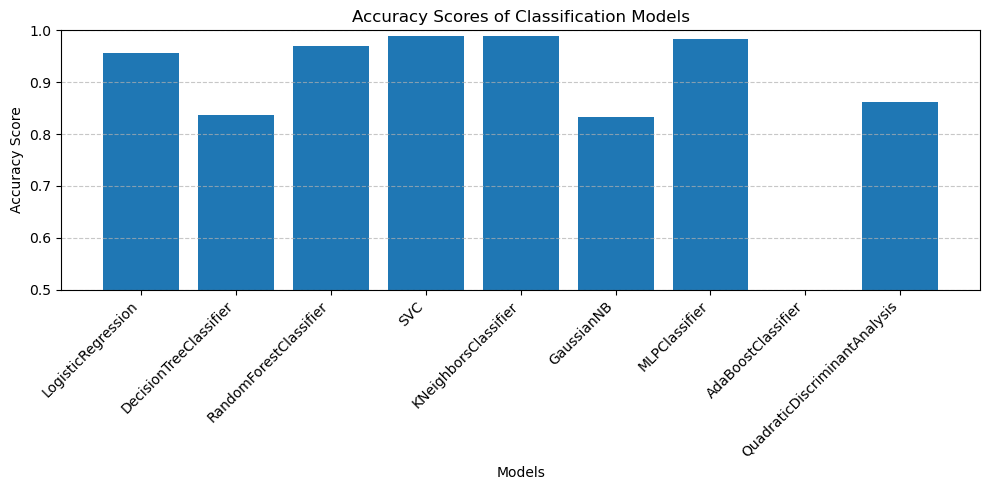

In [139]:
# plot the accuracy of chat

fig, ax = plt.subplots(figsize=(10,5))

# set data 
ax.bar(model_scores.keys(), model_scores.values())

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classification Models')
plt.ylim(0.5, 1.0)  # Setting y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


fig.savefig("images/accuracy_scores.png")

its look like **svc** and **KNeighbors** are equal and highest in scores

### KNeighborsClassifier

In [147]:
# instantiate the model
model = KNeighborsClassifier()

# fit the model
model.fit(xtrain, ytrain)

# score the model
model.score(xtest, ytest)

0.9888888888888889

In [149]:
ypred = model.predict(xtest)
ypred[:4]

array([7, 1, 3, 0])

In [153]:
ytest[:4]

,0
1275,7
1256,1
1477,3
565,0


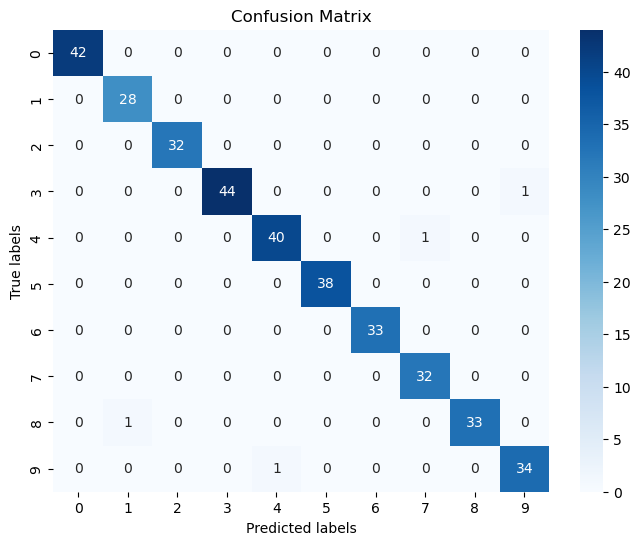

In [158]:
# Compute confusion matrix
cm = confusion_matrix(ytest, ypred)
        
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix')


# Save plot to file
plt.savefig('images/confusion_matrix.png')


plt.show()

In [164]:
# Compute evaluation metrics
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')  # Specify 'weighted' for multiclass
recall = recall_score(ytest, ypred, average='weighted')  # Specify 'weighted' for multiclass
f1 = f1_score(ytest, ypred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99


## Evaluation

In [168]:
%%time
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

#set random seed
np.random.seed(13)

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(xtrain, ytrain)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.99
CPU times: total: 141 ms
Wall time: 484 ms


In [171]:
# Evaluate best model with best param
best_model = KNeighborsClassifier(n_neighbors= 3, weights= 'distance')

#fit the model
best_model.fit(xtrain,ytrain)

# score the model
test_accuracy = best_model.score(xtest, ytest)

#print score
print("Test set accuracy of best model: {:.2f}".format(test_accuracy))

Test set accuracy of best model: 0.99


## Save the model 

In [179]:
## saving the model 
with open('model/best_knn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)